In [3]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.tri as tri
from functools import reduce

from scipy.special import softmax

# Main function for ploating

In [26]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

def draw_pdf_contours(dist, nlevels=10, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]
    
    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    

In [27]:
# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

# Dirichlet

In [28]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])

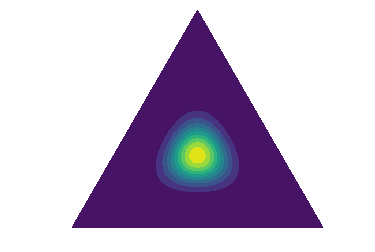

In [29]:
dist = Dirichlet([10, 10, 10])
draw_pdf_contours(dist)

# Gumbel-Softmax

In [30]:
class GumbelSoftmax(object):
    def __init__(self, s=[1], tau = 1):
        """
        Args:
            s, array with the shape [k] --- "class probability"
            tau, float > 0 --- temperature

        Returns:
            array with the shape [k] --- probability to each classes from gumbel softmax distribution
        """
        from math import gamma
        from operator import mul
        self.s = np.array(s)
        self.tau = tau
        
        self.k = len(self.s) 
        self.coef = gamma(self.k)*(self.tau**(self.k-1))*(reduce(mul, self.s))
        
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        x = np.array(x)
        return self.coef * (self.s*(x**(-self.tau))).sum()**(-self.k)*reduce(mul, x**(-self.tau-1))
    
    def __call__(self, size=None):
        k = len(s)
        if size is not None:
            return [softmax(s + np.random.gumbel(size = k)) for _ in range(size)]
        else:
            return softmax(s + np.random.gumbel(size = k))

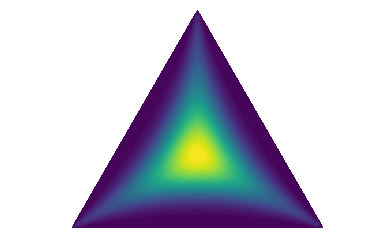

In [60]:
dist = GumbelSoftmax([10, 10, 10], 2)
draw_pdf_contours(dist, nlevels=50, subdiv=6)

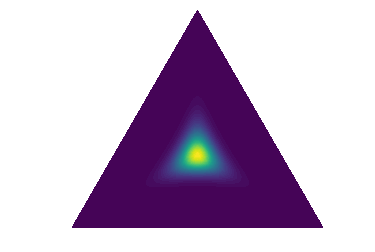

In [62]:
dist = GumbelSoftmax([10, 10, 10], 5)
draw_pdf_contours(dist, nlevels=50, subdiv=6)

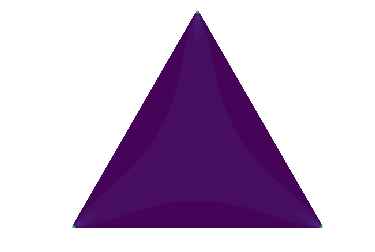

In [64]:
dist = GumbelSoftmax([10, 10, 10], 1.2)
draw_pdf_contours(dist, nlevels=50, subdiv=6)

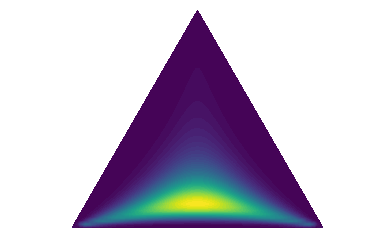

In [61]:
dist = GumbelSoftmax([10, 10, 1], 2)
draw_pdf_contours(dist, nlevels=50, subdiv=6)

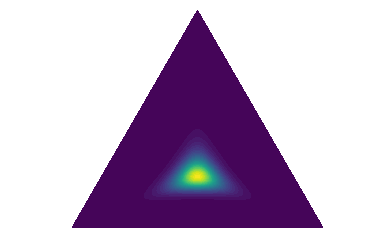

In [63]:
dist = GumbelSoftmax([10, 10, 1], 5)
draw_pdf_contours(dist, nlevels=50, subdiv=6)

In [ ]:
dist = GumbelSoftmax([10, 10, 10], 1.2)
draw_pdf_contours(dist, nlevels=50, subdiv=6)